In [1]:
!python --version

Python 3.12.5


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('Datasets/doped_oxides.csv')

In [6]:
parameters = ['band_gap', 'crystal_size', 'ssa', 'a', 'c']

In [38]:
df = data[parameters]

In [8]:
df_scaled = data[parameters]

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
df_scaled[parameters] = scaler.fit_transform(df)

/tmp/ipykernel_406327/2278962961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled[parameters] = scaler.fit_transform(df)


In [11]:
df_scaled.head()

,band_gap,crystal_size,ssa,a,c
0,0.785259,-0.155965,-1.089097,-1.419944,-0.059782
1,0.659047,-0.681930,-0.380191,-0.615939,-0.101766
2,-1.710123,NaN,0.053591,-1.054487,-6.124692
3,-1.421640,NaN,0.732115,0.845887,-0.155995
4,-2.251030,NaN,0.332090,3.623357,3.361897


In [39]:
X = df[['crystal_size', 'ssa', 'a', 'c']]
y  = df.band_gap 

In [13]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
reg = RandomForestRegressor(n_estimators=1000, random_state=0, oob_score=True)

In [45]:
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
predictions = reg.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 0.1136101652082803
R-squared: 0.11606624730690829


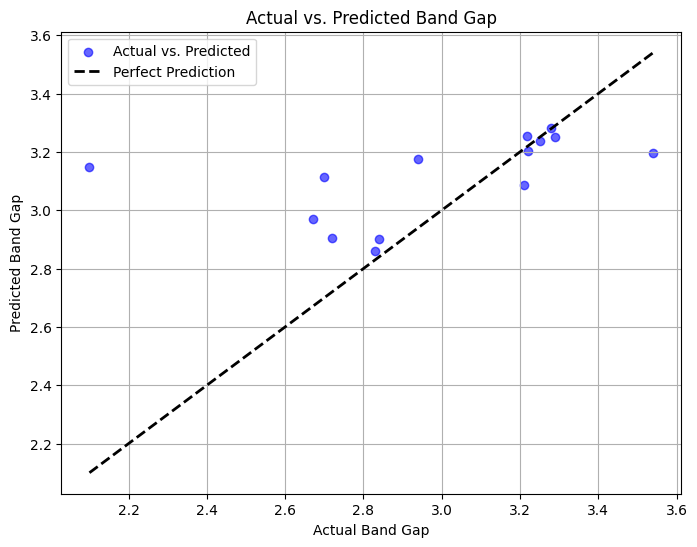

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='b', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs. Predicted Band Gap')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import xgboost as xgb

In [48]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [49]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [50]:
preds = model.predict(dtest_reg)

In [51]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.351


/home/abhi/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [48]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9],
} 

In [49]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid) 

grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=6,
                      n_estimators=50)


In [51]:
pred = grid_search.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.02463734151910613
R-squared: 0.6024361598208108
